In [1]:
from Bio import SeqIO
from Bio.SeqUtils import molecular_weight
import matplotlib.pyplot as plt
import numpy as np

fasta_file ='sequence.fasta'
genome_sequence = SeqIO.read(fasta_file,'fasta')

In [2]:
print(genome_sequence)

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [3]:
sequence_length=len(genome_sequence)
print(sequence_length)

29903


In [4]:
dna_sequence=genome_sequence.seq

In [5]:
first_30_dna=dna_sequence[:30]
print(first_30_dna)

ATTAAAGGTTTATACCTTCCCAGGTAACAA


In [6]:
first_30_rna=dna_sequence.transcribe()[:30]
print(first_30_rna)

AUUAAAGGUUUAUACCUUCCCAGGUAACAA


In [7]:
first_10_proteins=dna_sequence.translate()[:10]
print(first_10_proteins)

IKGLYLPR*Q


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [8]:
nc=[]
#count nucleotides
nucleotides = ['A','T','G','C']
counts = [genome_sequence.seq.count(base) for base in nucleotides]

for i,base in enumerate(nucleotides):
    print(f'The number of {base}: {counts[i]}')
    nc.append(counts[i])

The number of A: 8954
The number of T: 9594
The number of G: 5863
The number of C: 5492


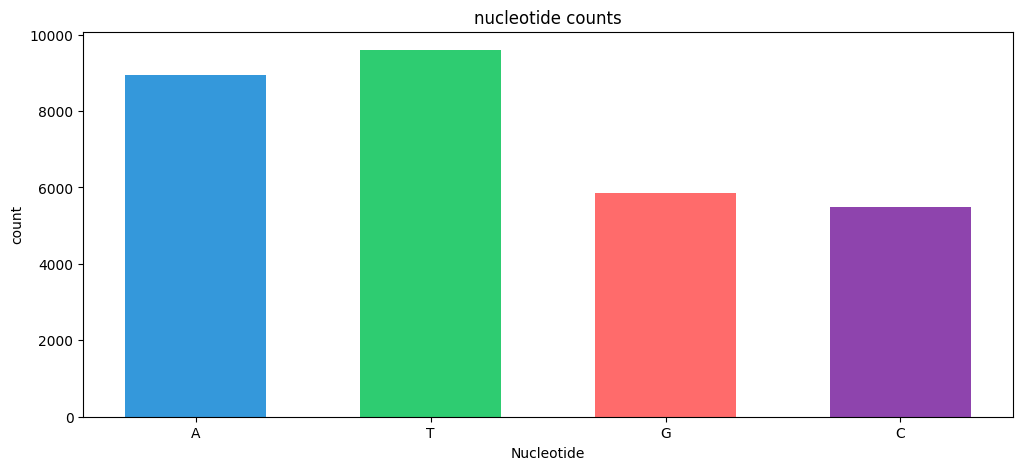

In [9]:
#plot
#step1:set the figure size
plt.figure(figsize =(12,5))

#step2:chooe the type of the chart
plt.bar(nucleotides, counts, color = ['#3498db','#2ecc71','#ff6b6b','#8e44ad'],width=0.6)
plt.xlabel('Nucleotide')
plt.ylabel('count')
plt.title('nucleotide counts')
plt.show()

In [10]:
gc_count=sum(1 for base in genome_sequence.seq if base in 'GC')
gc_percentage=(gc_count/sequence_length)*100
at_percentage=100-gc_percentage
print('GC content:',gc_percentage)
print('AT content:',at_percentage)

GC content: 37.97277865097147
AT content: 62.02722134902853


In [11]:
from Bio.SeqUtils import gc_fraction

gc_count = gc_fraction(dna_sequence)
print(gc_count*100)

37.97277865097147


In [12]:
#determine the nucleotide bases
nucleotides=['A','T','G','C']
counts = [genome_sequence.seq.count(base) for base in nucleotides]
G_count = counts[nucleotides.index('G')]
C_count = counts[nucleotides.index('C')]
GC_skew = (G_count-C_count)/(G_count+C_count)
print('GC_skew:',GC_skew)

GC_skew: 0.032672831351827386


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 0.0, 0.0, 0.0, -0.2, -0.3333333333333333, -0.42857142857142855, -0.42857142857142855, -0.25, -0.1111111111111111, -0.1111111111111111, -0.1111111111111111, -0.1111111111111111, -0.2, -0.2, -0.2, -0.2, -0.2727272727272727, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.38461538461538464, -0.42857142857142855, -0.42857142857142855, -0.42857142857142855, -0.4666666666666667, -0.4666666666666667, -0.4666666666666667, -0.4666666666666667, -0.5, -0.4117647058823529, -0.4117647058823529, -0.4117647058823529, -0.4444444444444444, -0.4444444444444444, -0.47368421052631576]


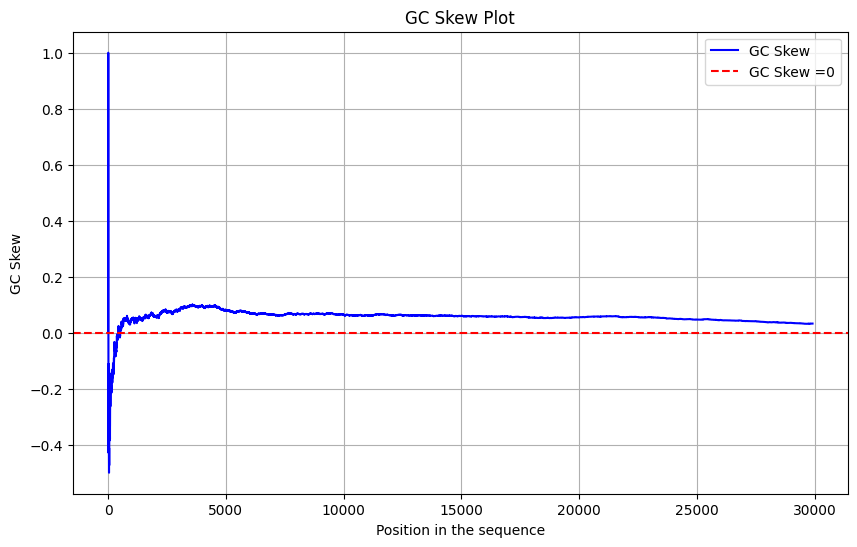

In [13]:
import matplotlib.pyplot as plt
from Bio import SeqIO

fasta_file='sequence.fasta'
sequence_record=SeqIO.read(fasta_file,'fasta')
sequence=sequence_record.seq

def calculate_gc_skew(sequence):
    gc_skew=[]
    g_count=0
    c_count=0
    for base in sequence:
        if base =='G':
            g_count +=1
        elif base =='C':
            c_count +=1
            
        if g_count +c_count ==0:
            gc_skew.append(0.0)
        else:
            gc_skew.append((g_count-c_count)/(g_count +c_count))
    return gc_skew

gc_skew_values = calculate_gc_skew(sequence)
print(gc_skew_values[:50])

plt.figure(figsize = (10,6))

plt.plot(range(len(sequence)),gc_skew_values,label ='GC Skew', color ='blue')

plt.xlabel('Position in the sequence')
plt.ylabel('GC Skew')
plt.title('GC Skew Plot')
plt.axhline(0, color = 'red',linestyle ='--',label ='GC Skew =0')
plt.legend()
plt.grid(True)
plt.show()
         

In [14]:
genome_mw =molecular_weight(genome_sequence.seq)
print('Molecular_weight:',genome_mw,'Da')

Molecular_weight: 9241219.214399999 Da


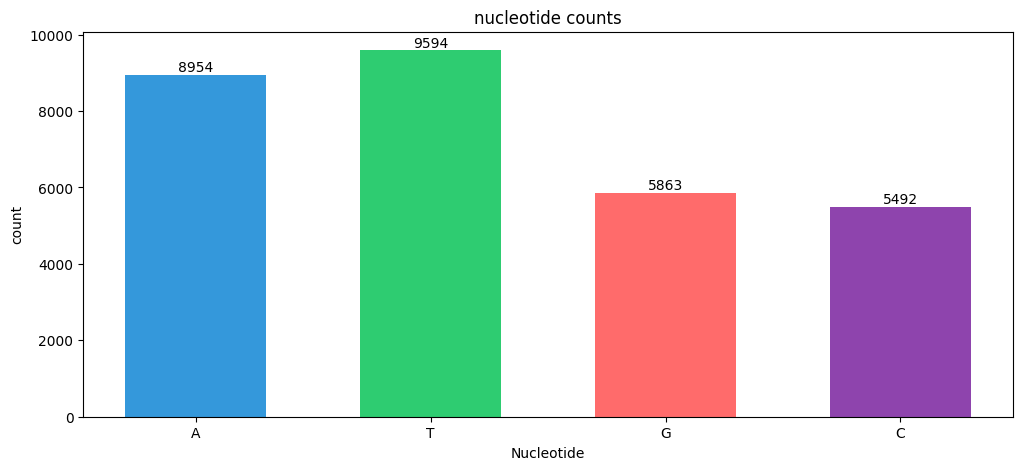

In [15]:
#plot
#step1:set the figure size
plt.figure(figsize =(12,5))

#step2:choose the type of the chart
plt.bar(nucleotides, counts, color = ['#3498db','#2ecc71','#ff6b6b','#8e44ad'],width=0.6)
plt.xlabel('Nucleotide')
plt.ylabel('count')
plt.title('nucleotide counts')


for i,count in enumerate(counts):
    plt.text(i,count,int(count),ha='center',va='bottom',color='black')

plt.show()



 k-mer Frequencies (k=5):
TTGTT: 102
TGTTA: 101
AACAA: 99
TGTTG: 97
TTTTG: 97
TTCTT: 97
TTACA: 96
TTAAA: 95
AAATT: 95
TTATG: 92
TGGTG: 92
TTTAA: 91
TGTTT: 91
TGATG: 91
GTGTT: 90
TTTTA: 90
ACAAA: 89
TTTGT: 88
AAAAA: 85
TACAA: 83
AAGAA: 82
CTTTT: 82
TGCTG: 81
AATTT: 81
TAATG: 81
AATTA: 80
ACTTT: 79
TAAAA: 79
TTACT: 79
GTTTT: 79
CTTTA: 77
ATGGT: 77
ATTTT: 77
ACAAT: 77
TTTAT: 75
TGCTT: 75
AAACA: 75
CAACA: 75
TTGTA: 74
TTAAT: 74
AAAGA: 73
ACAAC: 73
TTGCT: 73
CAACT: 72
AGAAA: 72
TTTAC: 72
TTATT: 72
TAACA: 71
AATGT: 71
CTGTT: 70
AAAAT: 70
TACTT: 70
GTTTA: 69
CTAAA: 69
TGGTT: 69
TTGTG: 69
GTTGT: 69
AACTT: 68
ATGTT: 68
TGGTA: 68
TATGA: 68
AAATG: 68
ATTGT: 68
TATTA: 68
CTTGT: 67
AACAT: 67
ATTAT: 67
TCTTT: 67
ATGCT: 66
AAAAG: 66
ACTTA: 66
AATTG: 66
CTATT: 66
CAATT: 66
TGCTA: 66
TACTA: 66
ACATT: 66
TAATT: 65
TGACA: 65
TTGAA: 65
TAAAG: 64
TGTAG: 64
TTCAA: 64
TAAAT: 64
AATGG: 64
TTGAT: 64
AGAAG: 63
TTTCT: 63
ATTAC: 62
GTTGA: 62
CTGCT: 62
AGTTT: 62
CTTAT: 62
TGAAA: 62
TTGGT: 62
ACAGA: 62
TGTGT: 61
C

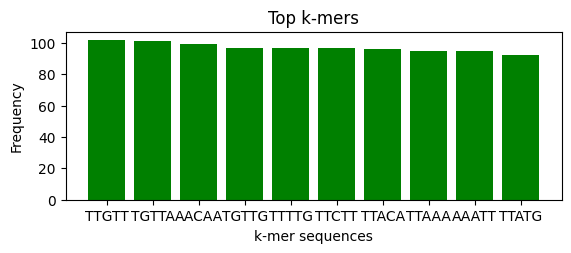

In [16]:
from Bio import SeqIO
from Bio.SeqUtils import molecular_weight
import matplotlib.pyplot as plt
import numpy as np

fasta_file ='sequence.fasta'
genome_sequence = SeqIO.read(fasta_file,'fasta')

k = 5  # we can change k to our desired k size
kmer_counts={}

# Assuming genome_sequence is defined somewhere
for i in range(len(genome_sequence.seq) - k + 1):
    kmer =str(genome_sequence.seq[i:i + k])
    kmer_counts[kmer] = kmer_counts.get(kmer, 0) + 1

# sort k-mer frequencies
sorted_kmers = sorted(kmer_counts.items(),key=lambda x:x[1],reverse=True)
top_kmers = sorted_kmers[:10]  # Display the top 10 most frequent k-mers

# Create a bar chart for k-mer frequencies
plt.subplot(2, 1, 2)
kmers,counts = zip(*top_kmers)
plt.bar(kmers, counts, color='green')
plt.title('Top k-mers')
plt.xlabel('k-mer sequences')
plt.ylabel('Frequency')

# Output the frequencies
print(f'\n k-mer Frequencies (k={k}):')
for kmer, frequency in sorted_kmers:
    print(f'{kmer}: {frequency}')

plt.show()  # Don't forget to show the plot

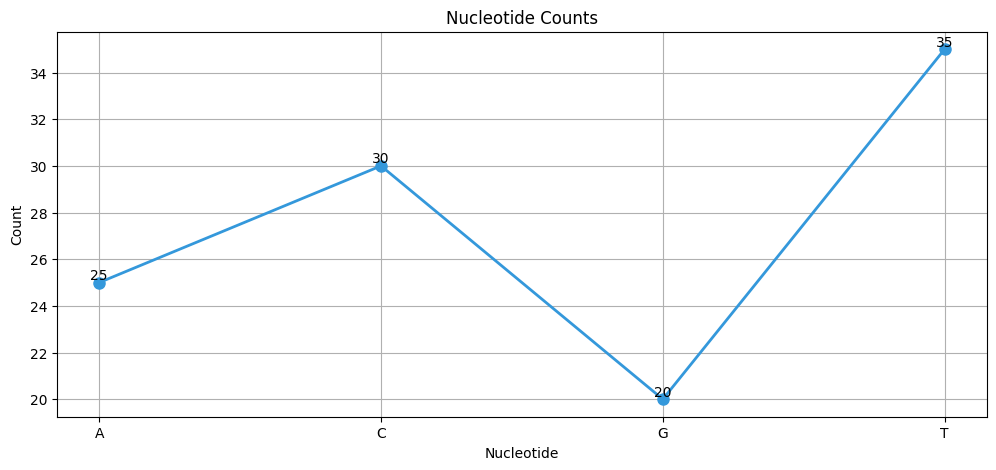

In [17]:
import matplotlib.pyplot as plt

# Data
nucleotides = ['A', 'C', 'G', 'T']
counts = [25, 30, 20, 35]

# Set the figure size
plt.figure(figsize=(12, 5))

# Choose the type of chart (line chart)
plt.plot(nucleotides, counts, marker='o', color='#3498db', linewidth=2, markersize=8)

# Adding labels and title
plt.xlabel('Nucleotide')
plt.ylabel('Count')
plt.title('Nucleotide Counts')

# Adding text labels
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black')

# Display the plot
plt.grid(True)  # Add gridlines for better visualization
plt.show()

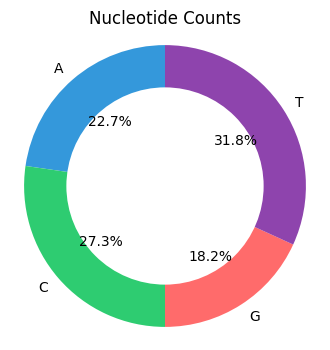

In [18]:
import matplotlib.pyplot as plt

# Data
nucleotides = ['A', 'C', 'G', 'T']
counts = [25, 30, 20, 35]

# Set the figure size
plt.figure(figsize=(4, 4))

# Create a pie chart
plt.pie(counts, labels=nucleotides, autopct='%1.1f%%', startangle=90, colors=['#3498db', '#2ecc71', '#ff6b6b', '#8e44ad'])

# Draw a circle at the center of pie to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding title
plt.title('Nucleotide Counts')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()


In [19]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# Example Zika Virus Nucleotide Sequence (just for demonstration)
zika_sequence = "ATTAAAGGTTTATACCTTCCCAGGTAACAA"

# Function to detect Zika virus
def detect_zika(input_sequence):
    alignments = pairwise2.align.globalxx(zika_sequence, input_sequence)
    
    # Assuming the best alignment is the first one
    best_alignment = alignments[0]
    match_percentage = (best_alignment[2] / len(zika_sequence)) * 100

    # Example treatment stage determination based on matching percentage
    if match_percentage >= 90:
        treatment_stage = "Severe"
    elif match_percentage >= 70:
        treatment_stage = "Moderate"
    else:
        treatment_stage = "Mild"
    
    # Output results
    print("Matching Sequence Percentage: {:.2f}%".format(match_percentage))
    print("Treatment Stage: ", treatment_stage)
    print("Zika Virus Detected" if match_percentage >= 70 else "Zika Virus Not Detected")

# Example input human nucleotide sequence
human_sequence=input("enter seq:")

detect_zika(human_sequence)


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


Matching Sequence Percentage: 16.67%
Treatment Stage:  Mild
Zika Virus Not Detected
